In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import sys
import os

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [38]:
# Reading in the data
df_15 = pd.read_csv('~/Desktop/cs209a-FinalProject/Harvard_G1/data/Merged_Fundamentals_and_Polls/df_final_15_predictors.csv')
display(df_15)

,popular_vote_percentage,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff
0,49.55,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1,9.32,0.0854,5.6,892.500000,12542.043
1,49.55,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1,8.68,0.6699,28.2,993.000000,18721.174
2,49.55,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.272868,0.118448,-1.0,0,9.32,0.0854,5.6,892.500000,12542.043
3,49.55,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.272868,0.118448,-1.0,0,8.68,0.6699,28.2,993.000000,18721.174
4,45.07,0.825641,0.234242,-9.718823,-1.423503,0.031317,0.377789,-0.089281,0.0,0,9.32,0.0854,5.6,1038.500000,12542.043
5,55.18,-0.310126,0.261147,-1.243207,9.327366,0.115117,-0.339976,0.243113,-1.0,0,4.71,1.2493,43.4,1086.835000,14409.903
6,44.33,-0.310126,0.261147,-1.243207,9.327366,0.115117,0.145107,0.243113,-1.0,1,4.71,1.2493,43.4,837.915000,14409.903
7,57.37,0.277996,0.160302,-16.387651,6.012349,0.055845,0.396180,0.158822,1.0,0,11.00,1.5554,46.9,1157.000000,16877.643
8,41.97,0.277996,0.160302,-16.387651,6.012349,0.055845,0.134840,0.158822,1.0,1,11.00,1.5554,46.9,840.000000,16877.643
9,49.72,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.293195,0.118448,-1.0,1,8.68,0.6699,28.2,1025.500000,18721.174


In [39]:
# Splitting into training and testing sets
X = df_15.drop(['popular_vote_percentage'], axis=1)
Y = df_15['popular_vote_percentage']
X_train = X.drop([38,39]).values
y_train = Y.drop([38,39]).values
X_test = X.iloc[[38,39]].values
y_test = Y.iloc[[38,39]].values

In [40]:
# Standardizing the features
X_1 = df_15.drop(['popular_vote_percentage', 'Democrat_Republican', 'state_election'], axis=1)
scaler = StandardScaler()
scaler.fit(X_1)
x_2 = scaler.transform(X_1)
X_2 = pd.DataFrame(x_2, columns = ['NAP', 'payroll','stock','rdi','election','national_polls','gdp', 'NAP_weighted_diff', 'stock_weighted_diff', 'rdi_weighted_diff', 'national_polls_weighted_diff', 'gdp_weighted_diff'])
X_2['Democrat_Republican'] = df_15['Democrat_Republican']
X_2['state_election'] = df_15['state_election']
X_train1 = X_2.drop([38,39]).values
X_test1 = X_2.iloc[[38,39]].values
display(X_2)

,NAP,payroll,stock,rdi,election,national_polls,gdp,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff,Democrat_Republican,state_election
0,2.173238,0.689843,-0.186978,-0.458880,-0.010008,1.913493,-2.567628,0.962356,-1.190726,-2.083959,-0.382120,-1.174850,1,0.0
1,2.173238,0.689843,-0.186978,-0.458880,-0.010008,1.913493,-2.567628,0.598881,-0.218229,-0.297934,0.325011,-0.983051,1,0.0
2,-0.044997,0.019017,-0.164577,0.773146,-1.259938,-0.036156,0.410793,0.962356,-1.190726,-2.083959,-0.382120,-1.174850,0,-1.0
3,-0.044997,0.019017,-0.164577,0.773146,-1.259938,-0.036156,0.410793,0.598881,-0.218229,-0.297934,0.325011,-0.983051,0,-1.0
4,2.173238,0.689843,-0.186978,-0.458880,-0.010008,0.216181,-2.567628,0.962356,-1.190726,-2.083959,0.645154,-1.174850,0,0.0
5,-1.612361,0.813914,0.412372,1.616919,1.590903,-1.510055,2.198235,-1.655798,0.745782,0.903286,0.985245,-1.116872,0,-1.0
6,-1.612361,0.813914,0.412372,1.616919,1.590903,-0.343423,2.198235,-1.655798,0.745782,0.903286,-0.766186,-1.116872,1,-1.0
7,0.347896,0.348874,-0.658561,0.976849,0.458567,0.260411,0.989676,1.916478,1.255074,1.179883,1.478935,-1.040274,0,1.0
8,0.347896,0.348874,-0.658561,0.976849,0.458567,-0.368114,0.989676,1.916478,1.255074,1.179883,-0.751516,-1.040274,1,1.0
9,-0.044997,0.019017,-0.164577,0.773146,-1.259938,0.012733,0.410793,0.598881,-0.218229,-0.297934,0.553685,-0.983051,1,-1.0


In [41]:
X_2_y = X_2.copy()
X_2_y['popular_vote_percentage'] = df_15['popular_vote_percentage']
X_2_y = X_2_y.drop([38,39])

In [42]:
# Function to generate bootstrapped DataFrames
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [43]:
# Bootstrapped LassoCV
n_bootstraps = 100
coefs = []
intercepts = []
for n in range(n_bootstraps):
    df_new = bootstrap(X_2_y)
    #display(df_new)
    X_train_bootstrap = df_new.drop(['popular_vote_percentage'], axis = 1).values
    y_train_bootstrap = df_new['popular_vote_percentage'].values
    lassoCV = LassoCV(fit_intercept = True, cv = 5).fit(X_train_bootstrap, y_train_bootstrap)
    coefs.append(lassoCV.coef_)
    intercepts.append(lassoCV.intercept_)

/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09295753487978686, tolerance: 0.08867056709677419
  model = cd_fast.enet_coordinate_descent_gram(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22717597573902992, tolerance: 0.08867056709677419
  model = cd_fast.enet_coordinate_descent_gram(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25001954976031016, tolerance: 0.08867056709677419
  model = cd_fast.enet_coordinate_descent_gram(
/Users/talelokvenec/opt/a

In [44]:
# Re-formatting the coefficients lists for plotting 
coef1 = []
coef2 = []
coef3 = []
coef4 = []
coef5 = []
coef6 = []
coef7 = []
coef8 = []
coef9 = []
coef10 = []
coef11 = []
coef12 = []
coef13 = []
coef14 = []
for coef in coefs:
    if np.abs(float(coef[0])) >= 0.1:
        coef1.append(coef[0])
    else:
        coef1.append(0)
    if np.abs(coef[1]) >= 0.1:
        coef2.append(coef[1])
    else:
        coef2.append(0)
    if np.abs(coef[2]) >= 0.1:
        coef3.append(coef[2])
    else:
        coef3.append(0)
    if np.abs(coef[3]) >= 0.1:
        coef4.append(coef[3])
    else:
        coef4.append(0)
    if np.abs(coef[4]) >= 0.1:
        coef5.append(coef[4])
    else:
        coef5.append(0)
    if np.abs(coef[5]) >= 0.1:
        coef6.append(coef[5])
    else:
        coef6.append(0)
    if np.abs(coef[6]) >= 0.1:
        coef7.append(coef[6])
    else:
        coef7.append(0)
    if np.abs(coef[7]) >= 0.1:
        coef8.append(coef[7])
    else:
        coef8.append(0)
    if np.abs(coef[8]) >= 0.1:
        coef9.append(coef[8])
    else:
        coef9.append(0)
    if np.abs(coef[9]) >= 0.1:
        coef10.append(coef[9])
    else:
        coef10.append(0)
    if np.abs(coef[10]) >= 0.1:
        coef11.append(coef[10])
    else:
        coef11.append(0)
    if np.abs(coef[11]) >= 0.1:
        coef12.append(coef[11])
    else:
        coef12.append(0)
    if np.abs(coef[12]) >= 0.1:
        coef13.append(coef[12])
    else:
        coef13.append(0)
    if np.abs(coef[13]) >= 0.1:
        coef14.append(coef[13])
    else:
        coef14.append(0)

In [45]:
coefs = pd.DataFrame((coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,coef11,coef12,coef13,coef14), index = ['NAP', 'payroll','stock','rdi','election','national_polls','gdp', 'NAP_weighted_diff', 'stock_weighted_diff', 'rdi_weighted_diff', 'national_polls_weighted_diff', 'gdp_weighted_diff', 'Democrat_Republican', 'state_election'])
coefs = coefs.T

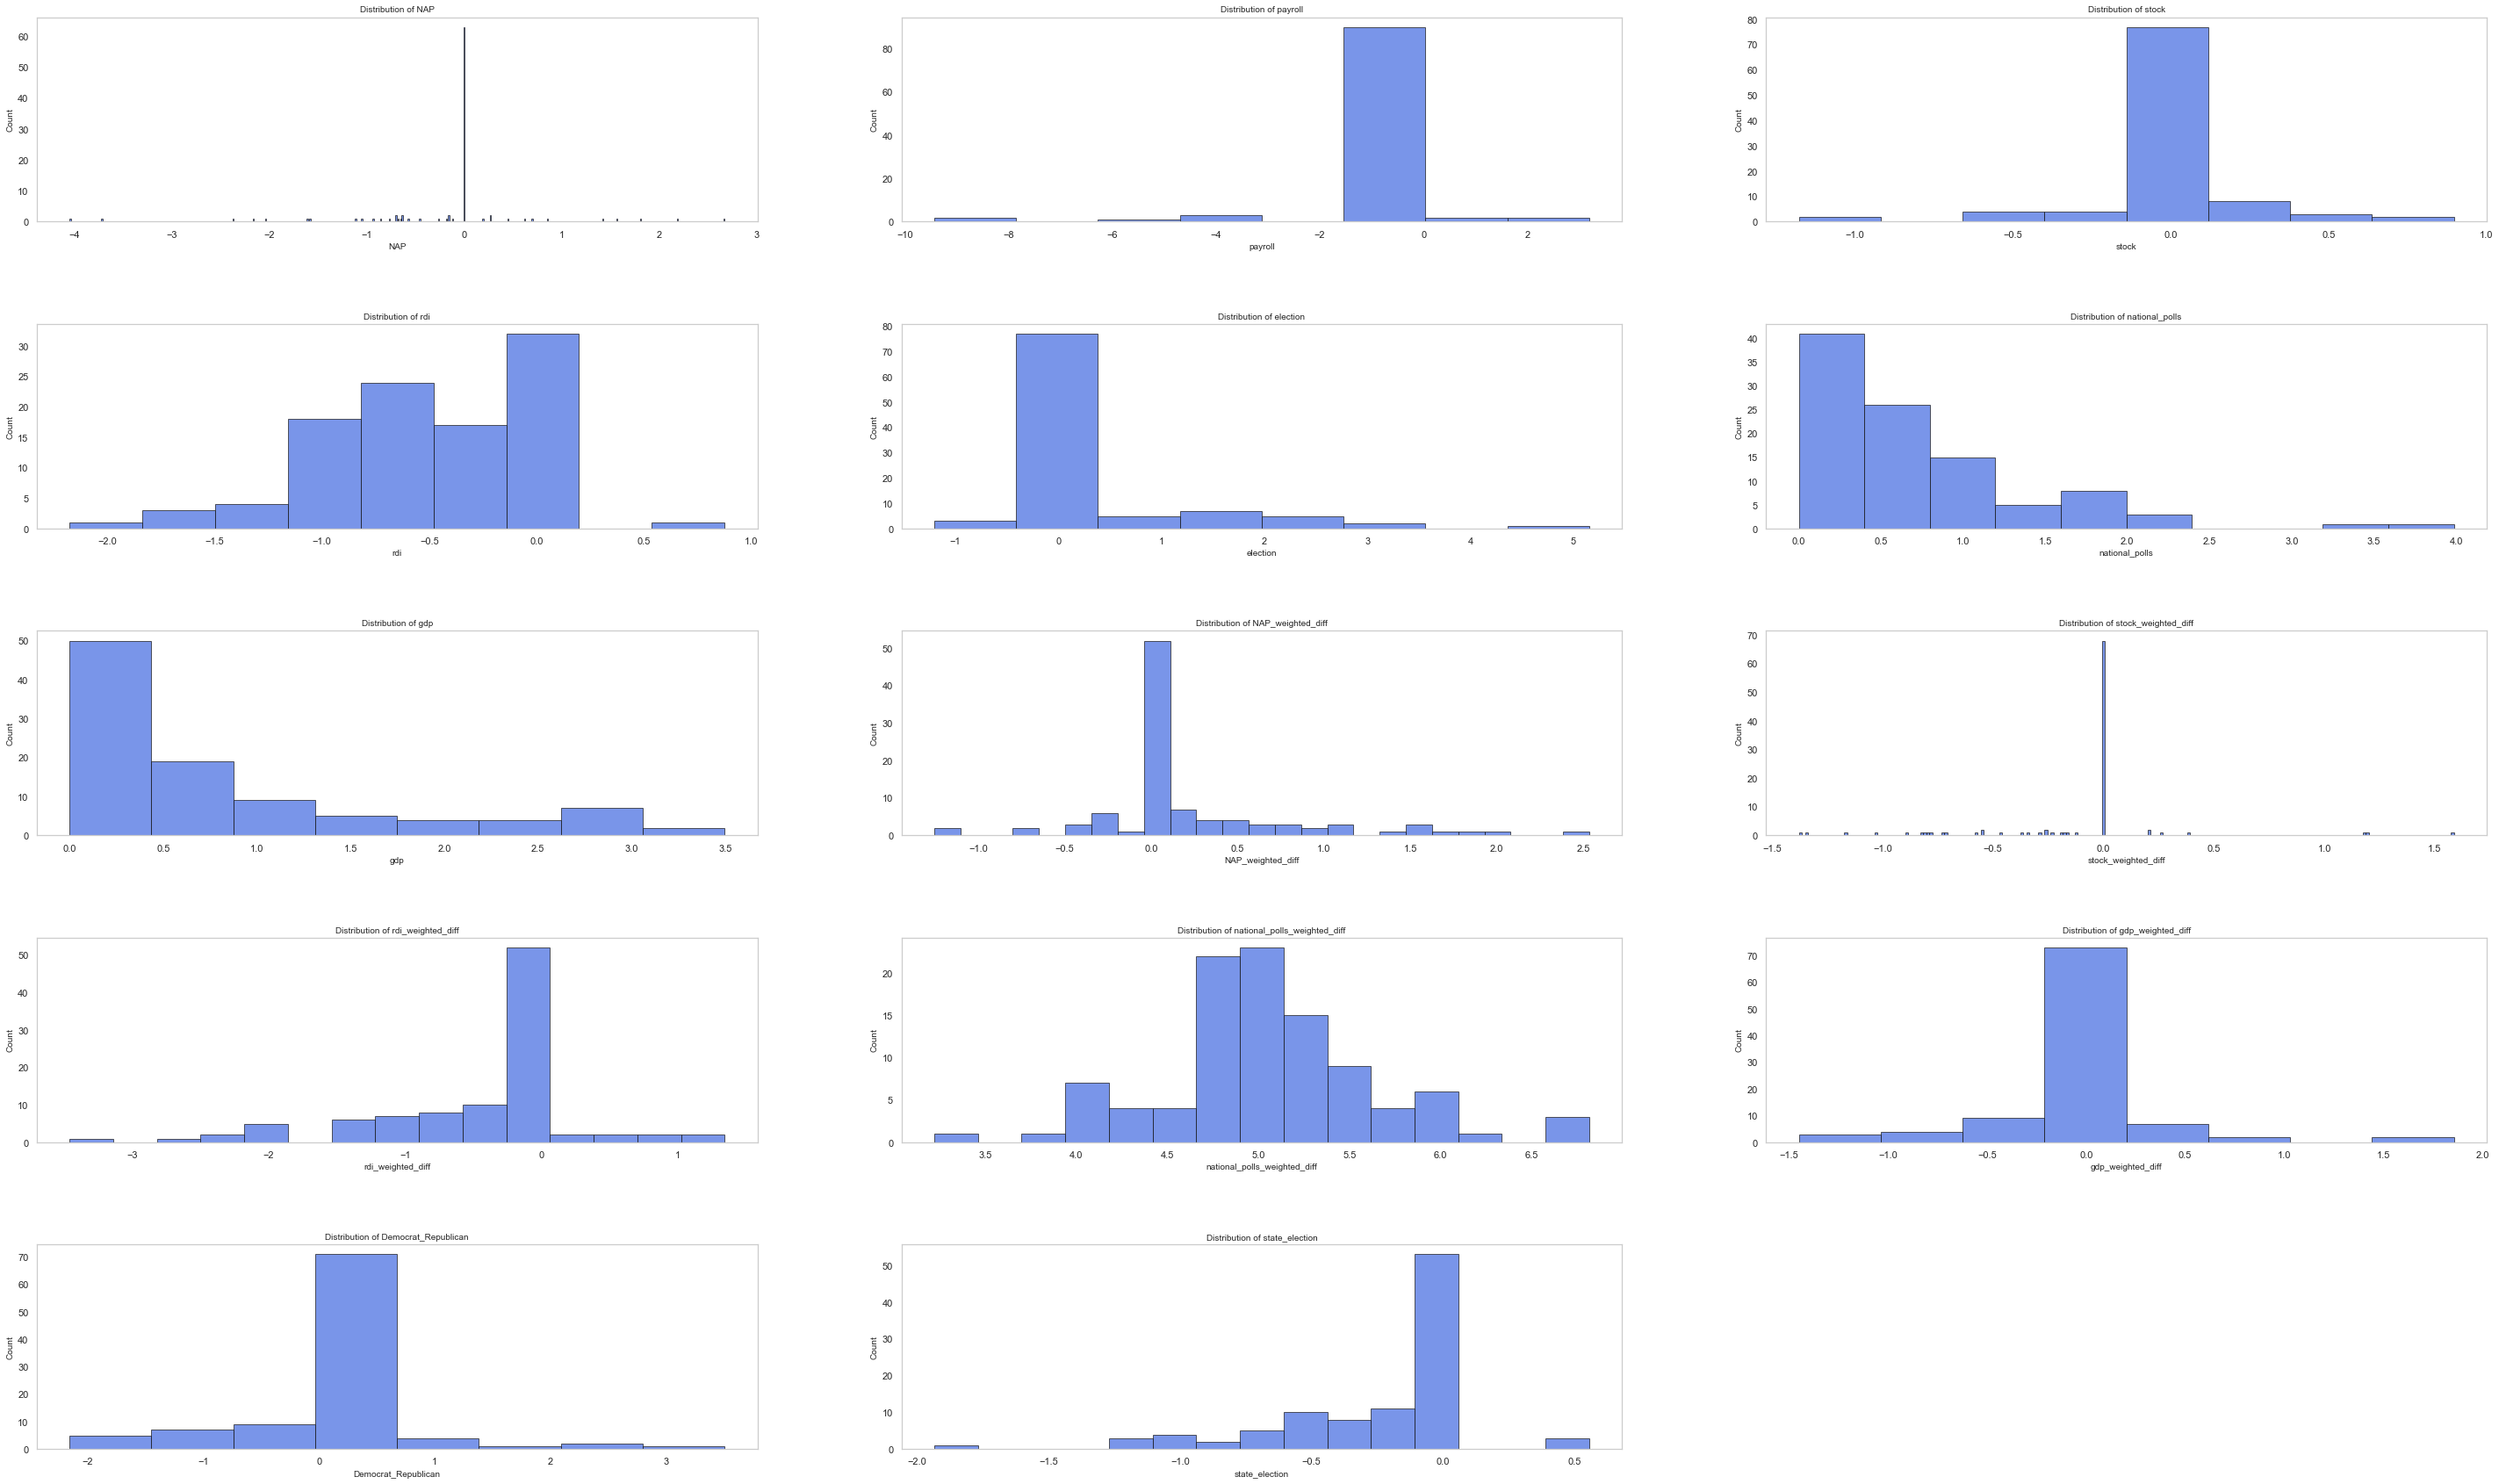

In [49]:
# Plotting histograms from bootstrapped LassoCV feature importance using 
plt.rcParams["axes.grid"] = False
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(50, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

variables = ['NAP', 'payroll','stock','rdi','election','national_polls','gdp', 'NAP_weighted_diff', 'stock_weighted_diff', 'rdi_weighted_diff', 'national_polls_weighted_diff', 'gdp_weighted_diff', 'Democrat_Republican', 'state_election']

# plot histograms
for i, variable in enumerate(variables):
    axs[i].hist(coefs[variable], alpha=0.7, color='royalblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + variable, fontsize=fontsize)
    axs[i].set_xlabel(variable, fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)
    
axs[14].set_axis_off()